# EDA

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 24, 26, 28, 31, 32, 33, 35, 38, 41, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 94, 100]
[181, 21, 10, 5, 3, 4, 2, 2, 4, 3, 4, 5, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 2, 1, 6, 6, 1, 3, 1, 5, 6, 8, 6, 8, 13, 8, 13, 23, 18, 25, 24, 32, 49, 54, 66, 87, 89, 89, 85, 117, 113, 98, 100, 93, 100, 77, 73, 53, 39, 32, 23, 25, 22, 11, 7, 8, 6, 5, 1, 3, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100] [235, 15, 3, 9, 21, 91, 533, 909, 178, 5]


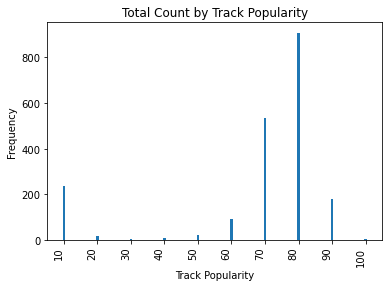

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


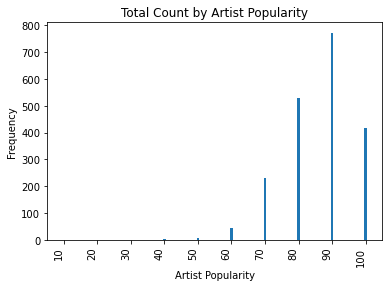

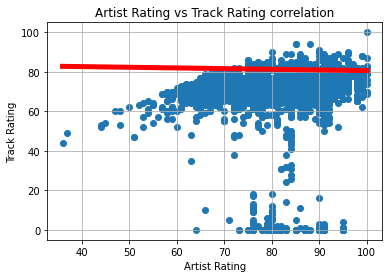

In [49]:
import importlib
import utils 
importlib.reload(utils)
import plot_utils
importlib.reload(plot_utils)
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

music_table = MyPyTable()
music_fname = os.path.join("input_data", "music-data.csv")
music_table.load_from_file(music_fname)



track_popularity_values, track_popularity_counts = utils.get_frequencies(music_table.data, music_table.column_names, "track_popularity")
track_popularity_values = list(track_popularity_values)
track_popularity_counts = list(track_popularity_counts)
print(track_popularity_values)
print(track_popularity_counts)
# plot_utils.bar_chart(list(track_popularity_values), list(track_popularity_counts), "track popularity")
discretized_counts = [0] * 10
print(discretized_counts)
for i, value in enumerate(track_popularity_values):
    if value <= 10:
        discretized_counts[0] += track_popularity_counts[i]
    elif value > 10 and value <= 20:
        discretized_counts[1] += track_popularity_counts[i]
    elif value > 20 and value <= 30:
        discretized_counts[2] += track_popularity_counts[i]
    elif value > 30 and value <= 40:
        discretized_counts[3] += track_popularity_counts[i]
    elif value > 40 and value <= 50:
        discretized_counts[4] += track_popularity_counts[i]
    elif value > 50 and value <= 60:
        discretized_counts[5] += track_popularity_counts[i]
    elif value > 60 and value <= 70:
        discretized_counts[6] += track_popularity_counts[i]
    elif value > 70 and value <= 80:
        discretized_counts[7] += track_popularity_counts[i]
    elif value > 80 and value <= 90:
        discretized_counts[8] += track_popularity_counts[i]
    elif value > 90:
        discretized_counts[9] += track_popularity_counts[i]
track_popularity_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(track_popularity_values, discretized_counts)
plot_utils.bar_chart(track_popularity_values, discretized_counts, "Track Popularity")


artist_popularity_values, artist_popularity_counts = utils.get_frequencies(music_table.data, music_table.column_names, "artist_popularity")
artist_popularity_values = list(artist_popularity_values)
artist_popularity_counts = list(artist_popularity_counts)
discretized_counts = [0] * 10
print(discretized_counts)
for i, value in enumerate(artist_popularity_values):
    if value <= 10:
        discretized_counts[0] += artist_popularity_counts[i]
    elif value > 10 and value <= 20:
        discretized_counts[1] += artist_popularity_counts[i]
    elif value > 20 and value <= 30:
        discretized_counts[2] += artist_popularity_counts[i]
    elif value > 30 and value <= 40:
        discretized_counts[3] += artist_popularity_counts[i]
    elif value > 40 and value <= 50:
        discretized_counts[4] += artist_popularity_counts[i]
    elif value > 50 and value <= 60:
        discretized_counts[5] += artist_popularity_counts[i]
    elif value > 60 and value <= 70:
        discretized_counts[6] += artist_popularity_counts[i]
    elif value > 70 and value <= 80:
        discretized_counts[7] += artist_popularity_counts[i]
    elif value > 80 and value <= 90:
        discretized_counts[8] += artist_popularity_counts[i]
    elif value > 90:
        discretized_counts[9] += artist_popularity_counts[i]
artist_popularity_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plot_utils.bar_chart(artist_popularity_values, discretized_counts, "Artist Popularity")



all_artist_pop_values = utils.get_column(music_table.data, music_table.column_names, "artist_popularity")
all_track_pop_values = utils.get_column(music_table.data, music_table.column_names, "track_popularity")
m, b = utils.compute_slope_intercept(all_track_pop_values, all_artist_pop_values)
plot_utils.linear_regression("Artist Rating", "Track Rating", all_artist_pop_values, all_track_pop_values, m, b)
# year_values, year_counts = utils.get_frequencies(vg_table.data, vg_table.column_names, "Year")
# plot_utils.bar_chart(year_values, year_counts, "Year")
# genre_values, genre_counts = utils.get_frequencies(vg_table.data, vg_table.column_names, "Genre")
# plot_utils.bar_chart(genre_values, genre_counts, "Genre")
# sales_names = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
# sales_percents = utils.get_percentages(vg_table, sales_names)
# plot_utils.pie_chart(sales_names[:-1], sales_percents, "Region Sales", "Percent of Global Sales")